In [55]:
import pandas as pd
import seaborn as sns

In [56]:
data = pd.read_csv("../data/suicidedataextrafestures.csv")\

## Посмотрим информацию о датасете

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 26 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   country                                                                            15110 non-null  object 
 1   year                                                                               15110 non-null  int64  
 2   sex                                                                                15110 non-null  object 
 3   age                                                                                15110 non-null  object 
 4   suicides_no                                                                        15110 non-null  int64  
 5   population                                                                         15110 non-null  int

In [67]:
data.shape

(15110, 26)

In [58]:
data.describe()

,year,suicides_no,population,suicidesper100k,yearlyHDI,GDPpyear,GDPpcapital,suicide%,Individuals using the Internet (% of population),Expense (% of GDP),...,"Unemployment, total (% of total labor force) (modeled ILO estimate)","Physicians (per 1,000 people)",Strength of legal rights index (0=weak to 12=strong),"Labor force, total","Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Refugee population by country or territory of origin,"Contributing family workers, total (% of total employment) (modeled ILO estimate)",Access to electricity (% of population),"Lower secondary completion rate, total (% of relevant age group)"
count,15110.000000,15110.000000,1.511000e+04,15110.000000,4740.000000,1.511000e+04,15110.000000,15110.000000,15002.000000,13634.000000,...,15110.000000,12782.000000,5618.000000,1.511000e+04,15110.000000,15110.000000,14978.000000,15110.000000,14642.000000,9542.000000
mean,2000.987690,398.831105,3.035752e+06,13.403846,0.805473,7.837162e+11,20722.516744,0.013404,23.297437,19.616559,...,5.666988,1.807460,0.480598,1.252609e+07,50.020781,43.999561,12558.250768,2.794107,64.228897,42.367336
std,8.591292,1185.471686,4.908197e+06,17.656537,0.089959,1.903936e+12,19307.084627,0.017657,29.502869,17.154008,...,5.754279,1.733828,1.734895,2.460246e+07,36.100563,49.662299,51750.701129,6.374382,47.253081,46.156786
min,1985.000000,0.000000,4.400000e+03,0.000000,0.539000,1.201313e+09,357.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,16.000000,4.247912e+05,2.010000,0.740000,5.700843e+10,4431.000000,0.002009,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2001.000000,80.000000,1.052860e+06,7.330000,0.823000,2.099510e+11,14729.000000,0.007333,6.079458,20.244213,...,5.100000,1.909000,0.000000,2.937065e+06,72.716000,16.012921,34.000000,0.518000,99.722549,0.000000
75%,2008.000000,275.000000,3.621750e+06,18.097500,0.884000,5.621755e+11,31630.000000,0.018095,43.984351,35.162572,...,8.855000,3.239000,0.000000,1.568707e+07,78.387805,91.749337,937.000000,2.095000,100.000000,92.810770
max,2016.000000,22338.000000,4.380521e+07,177.610000,0.944000,1.812070e+13,109804.000000,0.177609,96.546800,62.186783,...,33.473000,7.334100,12.000000,1.588311e+08,83.331951,172.121808,551744.000000,41.821999,100.000000,116.367400


In [59]:
data.head()

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,"Unemployment, total (% of total labor force) (modeled ILO estimate)","Physicians (per 1,000 people)",Strength of legal rights index (0=weak to 12=strong),"Labor force, total","Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Refugee population by country or territory of origin,"Contributing family workers, total (% of total employment) (modeled ILO estimate)",Access to electricity (% of population),"Lower secondary completion rate, total (% of relevant age group)"
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Проверим датасет на наличие null

In [60]:
data.isnull().head(5)

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,"Unemployment, total (% of total labor force) (modeled ILO estimate)","Physicians (per 1,000 people)",Strength of legal rights index (0=weak to 12=strong),"Labor force, total","Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Refugee population by country or territory of origin,"Contributing family workers, total (% of total employment) (modeled ILO estimate)",Access to electricity (% of population),"Lower secondary completion rate, total (% of relevant age group)"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Гипотеза №1
Зависимость кол-ва суицидов на единицу населения зависит от ВВП обратнопропорционально

Соберём данные о среднем количестве суицидов на 100к населения и среднем ВВП

In [61]:
data_by_country_gpd = data\
    .groupby(['country'], as_index=False)\
    .aggregate({'suicidesper100k': 'mean', 'GDPpyear': 'mean'})\
    .sort_values(axis=0, by='GDPpyear')

Из графика видно, что зависимости между этими двумя переменными нет

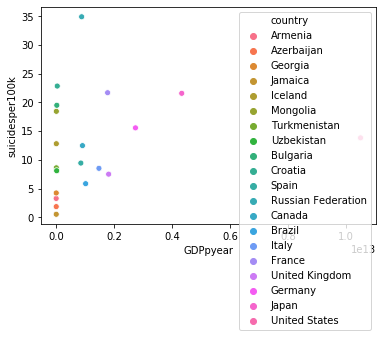

In [62]:
sns.scatterplot(x='GDPpyear',
                y='suicidesper100k',
                data=pd.concat([data_by_country_gpd.head(10), data_by_country_gpd.tail(10)]),
                hue='country'
                )

## Гипотеза 2
Зависимость кол-ва суицидов на единицу населения зависит от индекса прав обратнопропорционально

Соберём данные о среднем количестве суицидов на 100к населения и среднем значении индекса прав

In [63]:
data_by_country_hdi = data\
    .query('year >= 2012')\
    .groupby(['country'], as_index=False)\
    .aggregate({'suicidesper100k': 'mean', 'yearlyHDI': 'mean'})\
    .sort_values(axis=0, by='yearlyHDI')\
    .dropna()

Из графика видно, что зависимости между этими двумя переменными нет

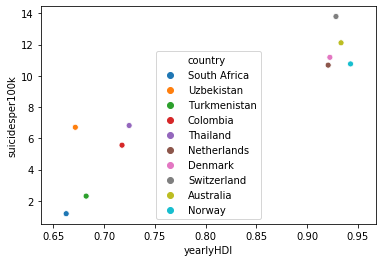

In [64]:
sns.scatterplot(x='yearlyHDI',
                y='suicidesper100k',
                data=pd.concat([data_by_country_hdi.head(5), data_by_country_hdi.tail(5)]),
                hue='country'
                )

## Гипотеза 3

Мужчины кончают жизнь самоубийством чаще женщин

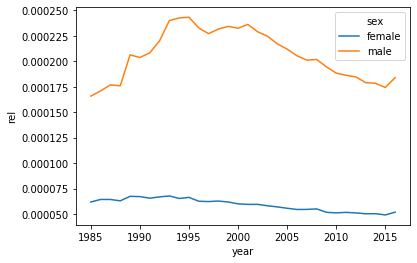

In [65]:
data_by_year_sex = data\
    .groupby(['year','sex'], as_index=False)\
    .aggregate({'suicides_no': 'sum', 'population': 'sum'})
data_by_year_sex['rel'] = data_by_year_sex['suicides_no'] / data_by_year_sex['population']
sns.lineplot(x='year', y='rel', hue='sex', data=data_by_year_sex)